# Project Telco Customer Churning Analysis

Project Idea:

- Predict customer churn using classification techniques like logistic regression or random forests.
- Perform feature engineering to understand which customer attributes (e.g., contract length, payment method) influence churn the most.

---

## About the Dataset

The telecoms churn dataset contains information aboutcustomers of a telecom company and whether they churned (cancelled their service) or not. It includes various features such as scustomer ddemographics (age, gender, etc.) andservice usage data (number of calles, minutes, billing methods, etc.)


This dataset consist of 7043 examples of 33 features, and is commonly used in machine learning and data analysis as a benchmark for predicting customer churn. It can be used to develop models that can identify at-risk customersand take steps to prevent churn, potentially leading to increased customer retention and revenue for the company.

### About the Feature

---
* **customerID**: Customer ID
* **gender**: Whether the customer is a male or female
* **Senior Citizen**: Whether the customer is a senior citizen or not (1,0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has a dependents or not (Yes, No)
* **Tenure Months**: Number of months the customer has stayed with the company
* **Phonse Service**: Whether the customer has a Phonse Service or not (Yes, No)
* **Multiple Lines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **Internet Service**: Customer's internet service provider (DSL, Fiber optic, No)
* **Online Security**: Whether the customerhas online security or not (Yes, No, No internet service)
* **Online Backup**: Whether the customer has online backup (Yes, No, No internet service)
* **Device Protection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **Tech Support**: Whether the customer has tech support or not (Yes, No, No internet service)
* **Streaming TV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **Streaming Movies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **Paperless Billing**: Whether the customer has paperless or not (Yes, No)
* **Payment Method**: The customer's payment method (Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))
* **Monthly Charges**: The amount charged to the customer monthly
* **Total Charges**: The total amount charged to the customer
* **Churn Label**: Whether the customer churned or not (Yes, No)

### Initial Plan for Data Exploration

1. Data Overview
    * Load the dataset and review its structure
    * Identify key columns, including customer demographics and churn status

2. Descriptive Analysis
    * Obtain summary statistics for numeric columns
    * Visualize the churn distribution and identify trends

3. Categorical Analysis
    * Explore categorical variables
    * Analyze their impact on churn rates

4. Churn Reasons
    * Investigate reasons for churn
    * Understand the main drivers of customer attrition

5. Correlation Analysis

6. Hypotheis Testing
    * Hypothesis 1: Phone Service Impact Churn
    * Hypothesis 2: Contract Type Affects Churn
    * Hypothesis 3: Seniority Affects Churn

7. Suggests for the next steps in analyzing the data

8. Summary of quality of data

## Import necessary libraries

In [36]:
import os
import pandas as pd
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro
import plotly.express as px
import warnings

# For k-prototypes
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

warnings.filterwarnings("ignore")

import matplotlib

matplotlib.rcParams['axes.labelsize'] = 9
matplotlib.rcParams['legend.fontsize'] = 9
matplotlib.rcParams['ytick.labelsize'] = 9
matplotlib.rcParams['xtick.labelsize'] = 9
# plt.style.use('classic')

## Overview of the Data

In [3]:
# Read the data into pandas DataFrame

df = pd.read_csv('archive/Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns \nNumber of rows: {n_rows} rows")

Number of columns: 33 columns 
Number of rows: 7043 rows


In [5]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

## Descriptive Analysis

**1. Total charge should be a float but it is showing as an object. Convert the data type from object to float**

In [6]:
total_charge = df['Total Charges']
missing = total_charge[~total_charge.str.replace('.','').str.isdigit()]
print('Number of missing total charge: ', len(missing))
missing

Number of missing total charge:  11


2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

As shown, the dataframe is missig values from the column total charge

In [7]:
# Convert the total charge column from object to float
df['Total Charges'] = df['Total Charges'].apply(pd.to_numeric, errors='coerce')

In [8]:
df['Total Charges'].dtype

dtype('float64')

**2. Displaying summary statistics of the numeric columns**

In [9]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [10]:
styled_df = (
    df.describe()
    .drop("count", axis = 0)
    .style.background_gradient(axis=0, cmap='magma')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'k')]}])
    .set_caption("Summary Statistics")
)

styled_df

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


From the table above, total charge is showing as categorical which should be not be so. It is supposed to be numeric column.
Can be solved later.




**3. Analysis of numeric columns with barchart**``

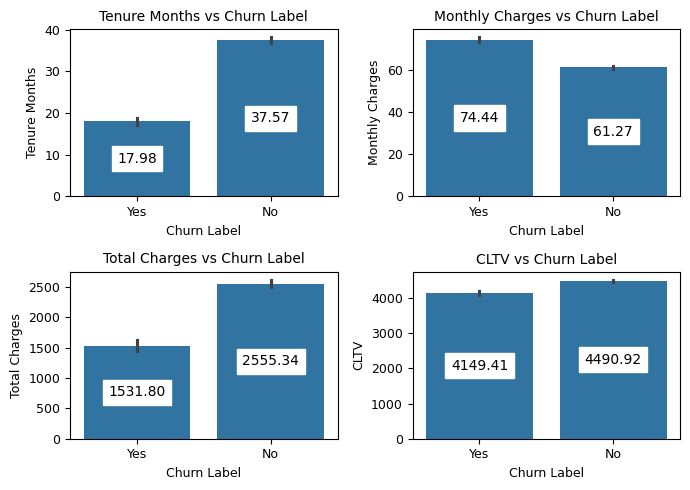

In [11]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop(
    ['Churn Value', 'Latitude', 'Longitude', 'Churn Score', 'Count', 'Zip Code'])

fig, axes = plt.subplots(2,2, figsize=(7,5))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    ax = axes[i]
    sns.barplot(data=df, x='Churn Label', y=column, ax=ax, estimator=np.mean)
    ax.set_title(f'{column} vs Churn Label', fontsize=10)
    
    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type='center', backgroundcolor='w', fmt='%.2f'
        )

fig.add_axes(axes[-1])
plt.tight_layout()
plt.show()

### Interpretation of results

Tenure Months:
* For customers who have not churned (Churn Label = "No"), the average tenure is approximately 37.57 months.
* For customers who have churned (Churn Label = "Yes"), the average tenancy is significantly lower, at around 17.98 months.
* This suggests that customers who have stayed longer with the company are less liekly to churn, as indicated by the lower average tenure for churned customers.

Monthly Charges:
* For customers who have not churned, the average monthly charges are approximately $61.27.
* For customers who have churned, the average monthly charges are slightly higher, around $74.44.
* This indicates that customers who have churned tend to have slightly higher monthy charges on average.

Total Charges:
* For customers who have not churned, the average total charges are approximately $2,554.77.
* For customers who have churned, the average total charges are notably lower, around $1,531.80.
* This suggests that customers who have accumulated higher total charges are more likely to continue their subscription and not churn.

CLTV (Customer Lifetime Value):
* For customers who have not churned, the average CLTV is approximately $4,490.92.
* For customers who have churned, the average CLTV is approximately $4,149.41.
* This indicates that customers who continue their subscriptions tend to have slightly higher average CLTV compared to churned customers.

## Categorical Analysis

**1. Getting unique categories in the dataset**

In [12]:
def get_unique(dataframe: DataFrame):
    cat_cols = dataframe.select_dtypes(exclude="number")
    uni_vals = []
    counts = []
    pct = []
    
    for col in cat_cols.columns:
        uni_val, count = np.unique(
            np.array(cat_cols[col], dtype=str), return_counts=True
        )
        uni_vals.append(uni_val)
        counts.append(count)
        pct.append(np.round(count / count.sum() * 100, 2))
        
    return pd.DataFrame(
        {
            'dtype': cat_cols.dtypes,
            'unique_vals': uni_vals,
            'counts': [len(val) for val in uni_vals],
            'values_counts': counts,
            'pct': pct
        }
    )

In [13]:
get_unique(df)

,dtype,unique_vals,counts,values_counts,pct
CustomerID,object,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."
Country,object,[United States],1,[7043],[100.0]
State,object,[California],1,[7043],[100.0]
City,object,"[Acampo, Acton, Adelanto, Adin, Agoura Hills, ...",1129,"[4, 4, 5, 4, 5, 4, 4, 8, 4, 4, 4, 4, 10, 4, 4,...","[0.06, 0.06, 0.07, 0.06, 0.07, 0.06, 0.06, 0.1..."
Lat Long,object,"[32.555828, -117.040073, 32.578103, -117.01297...",1652,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0..."
Gender,object,"[Female, Male]",2,"[3488, 3555]","[49.52, 50.48]"
Senior Citizen,object,"[No, Yes]",2,"[5901, 1142]","[83.79, 16.21]"
Partner,object,"[No, Yes]",2,"[3641, 3402]","[51.7, 48.3]"
Dependents,object,"[No, Yes]",2,"[5416, 1627]","[76.9, 23.1]"
Phone Service,object,"[No, Yes]",2,"[682, 6361]","[9.68, 90.32]"


**2. Analysis of categories frequencies based on churn labels**

In [14]:
df.dtypes[df.dtypes == "object"]

CustomerID           object
Country              object
State                object
City                 object
Lat Long             object
Gender               object
Senior Citizen       object
Partner              object
Dependents           object
Phone Service        object
Multiple Lines       object
Internet Service     object
Online Security      object
Online Backup        object
Device Protection    object
Tech Support         object
Streaming TV         object
Streaming Movies     object
Contract             object
Paperless Billing    object
Payment Method       object
Churn Label          object
Churn Reason         object
dtype: object

In [15]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index.drop(
    [
        'Churn Label',
        'Churn Reason',
        'City',
        'CustomerID',
        'Country',
        'State',
        'Lat Long'
    ]
)

categorical_counts = pd.DataFrame(
    columns = ['No', 'Yes'], index = pd.MultiIndex.from_tuples(['Group 1', 'A'])
)

for column in categorical_columns:
    table = pd.crosstab(index=df[column], columns=df['Churn Label'])
    index = pd.MultiIndex.from_tuples(
        list(zip([column] * df[column].nunique(), df[column].unique()))
    )
    table.index = index
    categorical_counts = pd.concat([categorical_counts, table])
    
categorical_counts.drop(categorical_counts.index[0], inplace=True)

categorical_counts.style.bar(
    axis=0, subset=['No', 'Yes'], align=100, width=100, height=70, color='cyan'
)

,No,Yes
"('A', nan, nan, nan, nan, nan, nan)",nan,nan
"('Gender', 'Male')",2549,939
"('Gender', 'Female')",2625,930
"('Senior Citizen', 'No')",4508,1393
"('Senior Citizen', 'Yes')",666,476
"('Partner', 'No')",2441,1200
"('Partner', 'Yes')",2733,669
"('Dependents', 'No')",3653,1763
"('Dependents', 'Yes')",1521,106
"('Phone Service', 'Yes')",512,170


**3. Visualizing frequencies**

In [16]:
cat_cols = df[categorical_columns]

fig, axes = plt.subplots(4,4, figsize=(20,18), dpi=500)
axes = axes.flatten()
fig.suptitle('Churn by Category', fontsize=25, fontweight='bold', y=1)

for i, col in enumerate(cat_cols.columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Churn Label', ax=ax, palette='Set2')
    ax.legend(frameon=True, facecolor='inherit', shadow=True)
    ax.set_title(f'Churn by {col}', fontsize=13)
    plt.tight_layout(pad=0.6)
    
    for i in ax.containers:
        ax.bar_label(i, fontsize=13)
        
plt.tight_layout()

### Customer Churn by Category
---

In this report, we'll examine the Telco Customer Churn dataset to understand customeer churn behavior. We've analyzed various categorical varriables in relation to the "Churn Labels," which indicates whether a customer has churned ("Yes") or not ("No").

### Gender

* Male: 2549 customers (No Churn: 2549, Churn: 939)
* Female: 2625 customers (No Churn: 2625, Churn: 930)


### Senior Citizen

* No: 4508 customers (No Churn: 4508, Churn:1393)
* Yes: 666 customers (No Churn: 666, Churn: 476)


### Partner

* No: 2441 customers (No Churn: 2441, Churn:1200)
* Yes: 2733 customers (No Churn: 2733, Churn: 669)


### Dependents

* No: 3653 customers (No Churn: 3653, Churn: 1763)
* Yes: 1521 customers (No Churn: 1521, Churn:106)


### Phone Service

* Yes: 512 customers (No Churn: 512, Churn:170)
* No: 4662 customers (No Churn: 4662, Churn: 1699)

### Multiple Lines

* No: 2541 customers (No Churn: 2541, Churn:849)
* Yes: 512 customers (No Churn: 512, Churn:170)
* No Phone Service: 2121 customers (No Churn: 2121, Churn:850)

### Internet Service

* DSL: 1962 customers (No Churn:1962, Churn:459)
* Fiber Optic: 1799 customers (No Churn: 1799, Churn:1297)
* No: 1413 customers (No Churn:1413, Churn:113)

### Online Security

* Yes: 2037 customers (No Churn:2037, Churn:1461)
* No: 1413 customers (No Churn:1413, Churn:113)
* No internet service: 1724 customers (No Churn:1724, Churn:295)

### Onlince Backup

* Yes: 1855 customers (No Churn:1855, Churn:1233)
* No: 1413 customers (No Churn:1413, Churn:113)
* No internet service: 1906 customers (No Churn:1906, Churn:523)

### Device Protection

* No: 1884 customers (No Churn:1884, Churn:1211)
* Yes: 1413 customers (No Churn:1413, Churn:113)
* No internet service: 1877 customers (No Churn:1877, Churn:545)

### Tech Support

* No: 2027 customers (No Churn:2027, Churn:1446)
* Yes: 1413 customers (No Churn:1413, Churn:113)
* No internet service: 1734 customers (No Churn:1734, Churn:310)

### Streamming TV

* No: 1868 customers (No Churn:1868, Churn:942)
* Yes: 1413 customers (No Churn:1413, Churn:113)
* No internet service: 1893 customers (No Churn:1893, Churn:814)

### Streaming Movies

* No: 1847 customers (No Churn:1847, Churn:938)
* Yes: 1413 customers (No Churn:1413, Churn:113)
* No internet service: 1914 customers (No Churn:1914, Churn:818)

### Contract

* Month-to-month: 2220 customers (No Churn: 2220, Churn:1655)
* Two Year: 1307 customers (No Churn:1307, Churn:166)
* One-Year: 1647 customers (No Churn:1647, Churn:48)

### Paperless Billing

* Yes: 2403 customers (No Churn:2403, Churn:469)
* No: 2771 customers (No Churn:2771, Churn:1400)

### Payment Method

* Mailed Check: 1286 customers (No Churn:1286, Churn:258)
* Electronic Check: 1290 customers (No Churn:1290, Churn:232)
* Bank transfer (automatic): 1294 customers (No Churn:1294, Churn:1071)
* Credit card (automatic): 1304 customers (No Churn:1304, Churn:308)

These insights can help identify patterns influencing customer churn, enabling data-driven decisions for customer retention strategies.


##4. Analsis of churn rate**

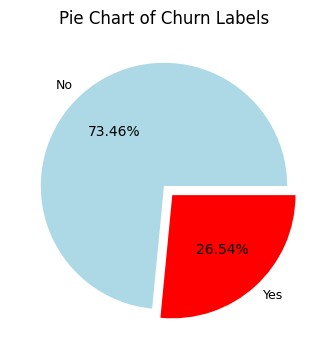

In [17]:
# Getting a sense of the percentage of churn labels

churn_label_count = df['Churn Label'].value_counts()
fig = plt.figure(figsize=(7,4), dpi=100)
plt.pie(
    churn_label_count,
    autopct='%.2f%%',
    labels=churn_label_count.index,
    colors=['lightblue', 'red'],
    explode=[0,0.1]
)

plt.title('Pie Chart of Churn Labels')
plt.show()

According to the pie chart, we can see that the churn rate is 26.54%

## Analsis of the reasons customers churn



**1. Displaying the results in datframe**

In [18]:
reasons = df['Churn Reason'][df['Churn Reason'].notna()]
reasons = reasons.value_counts().to_frame()
reasons.index.name = 'Churn Reasons'
reasons.columns = ['counts']
reasons = reasons.assign(percent=lambda x: x / reasons['counts'].sum())

formater = lambda x: f'{x:.2%}'
reasons['percent'] = reasons.percent.apply(formater)
reasons.reset_index(inplace=True)
reasons

,Churn Reasons,counts,percent
0,Attitude of support person,192,10.27%
1,Competitor offered higher download speeds,189,10.11%
2,Competitor offered more data,162,8.67%
3,Don't know,154,8.24%
4,Competitor made better offer,140,7.49%
5,Attitude of service provider,135,7.22%
6,Competitor had better devices,130,6.96%
7,Network reliability,103,5.51%
8,Product dissatisfaction,102,5.46%
9,Price too high,98,5.24%


In [19]:
reasons_temp = df['Churn Reason'][df['Churn Reason'].notna()].value_counts().to_frame()
reasons_temp.index.name = 'Churn Reasons'
reasons_temp.columns = ['counts']
reasons_temp['percent'] = reasons_temp['counts'] / reasons_temp['counts'].sum()
reasons_temp['percent'] = reasons_temp['percent'].apply(lambda x: f'{x:.2%}')

reasons_temp

,counts,percent
Churn Reasons,,
Attitude of support person,192,10.27%
Competitor offered higher download speeds,189,10.11%
Competitor offered more data,162,8.67%
Don't know,154,8.24%
Competitor made better offer,140,7.49%
Attitude of service provider,135,7.22%
Competitor had better devices,130,6.96%
Network reliability,103,5.51%
Product dissatisfaction,102,5.46%


**2. Displaying the results in a plot - Treemap**

In [20]:
fig = px.treemap(
    data_frame = reasons,
    path=['Churn Reasons'],
    values='counts',
    custom_data=['percent'],
    width=800,
    height=500,
    title='Churn Reasons Treemap',
)

fig.update_traces(
    hovertemplate = '%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]}',
    textinfo='label+value+percent entry'
)

fig.update_layout(margin=dict(t=30,l=10,r=10,b=10), title_x=0.5, title_y=0.96)
fig.show()

### Interpretation of Results
---

The analysis of churn reasons provides valuable insights into the factors contributing to customer churn. Several key findings emerge from the data. Firstly, approximately 10.27% of customers mentioned the "Attitude of Support Person" as their reason for churning, underscoring the significance of excellent customer service. Another 10.11% cited "Competitor Offered Higher Download Speeds," emphasizing the importance of offering competitive internet speeds. Additionally, "Competitor Offered More Data" was a reason for 8.67% of customers, indicating that data offerings play a critical role in customer retention.

A noteworthy observation is that 8.24% of customers simply mentioned "Don't Know" as their churn reason. This suggests a need for more comprehensive customer feedback and communication to address concerns. Furthermore, the data revealed that 7.49% of customers left because a competitor made a better offer, highlighting the importance of staying competitive in the market. Customer satisfaction also hinges on the "Attitude of Support Provider" (7.22%) and having acces to "Competitor Had Better Devices" (6.96%). These insights underline the multi-faceted nature of customer churn, emphasizing the need for comprehensive strategies to enhance customer experience, product offerings, and competitive pricing.

## Correlation Analysis

Pearson correlation coefficient to determine the columns that are correlated witheach so that we deal with them using PCA (Principal Component Analysis)

r = ∑(x_i - x)(y_i - y) / sqrt(∑(x_i - x)^2 ∑(y_i - y))^2

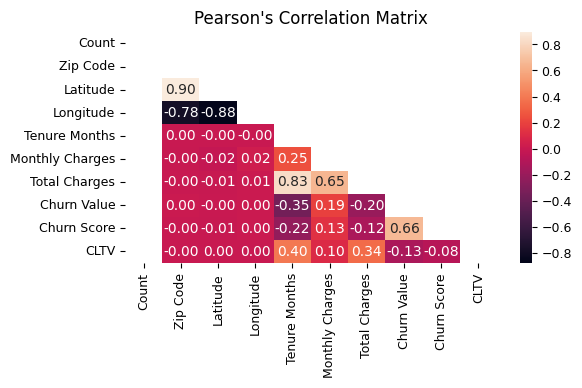

In [21]:
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,3))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linecolor='c')
plt.title("Pearson's Correlation Matrix")
plt.show()

### Interpretation of Correlation Coefficient
---

1. Tenure Months and Total Charges (0.825): 
    There is a strong positive correlation between tenure (number of months a customer has stayed with the company) and total charges. This suggests that customers who have been with the company for a longer time tend to accumulate higher total charges. It's an intuitive relationship as long-term customers are likely to pay more over time.

2. Tenure Months and Monthly Charges (0.248):
    Tenure Months and monthly charges have a positive correlation but it's relatively weaker. This indicates that, in general, longer-tenured customers tend to have slightly higher monthly charges. It's a subtle trend, suggesting that some long-term customers might choose higher-priced services.

3. Total Charges and CLTV (0.341): There's a positive correlation between total charges and Customer Lifetime Value (CLTV), indicating that customers who generate higher total charges are more valuable to the company in the long run. This correlation underscores the importance of retaining high-spending customers for business profitability.

These correlations provide a foundation for further analysis, such as identifying key factors influencing customer churn and understanding the drivers behind customer value and loyalty. Understanding these relationships can be valuable for decision-making and customer retention. strategies.

## Feature Engineering

**1. Dropping irrelevant columns from our analysis**

In [22]:
# Make copy of original 
df_FE = df.copy()

In [23]:
df_FE.drop(
    columns=['CustomerID', 'Country', 'State', 'Lat Long', 'Zip Code', 'Count'],
    inplace=True,
    errors='ignore',
)

**2. Dealing with missing values**

In [24]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

**As shown above, there are 11 null values in Total Charges column and 5174 null values in the Churn Reason column.**

The Churn Reason column has many missing values becuase most customers haven't left the company, leaving the reason field empty.

There are three methods we can approach:
* 1. Removing
* 2. Imputing
* 3. Masking

**Below Total Charges column is imputed with mean**

In [25]:
# Fill missing values with mean in Total Charges column
df_FE['Total Charges'].fillna(df['Total Charges'].mean(), inplace=True)

**3. Outliers Analysis**

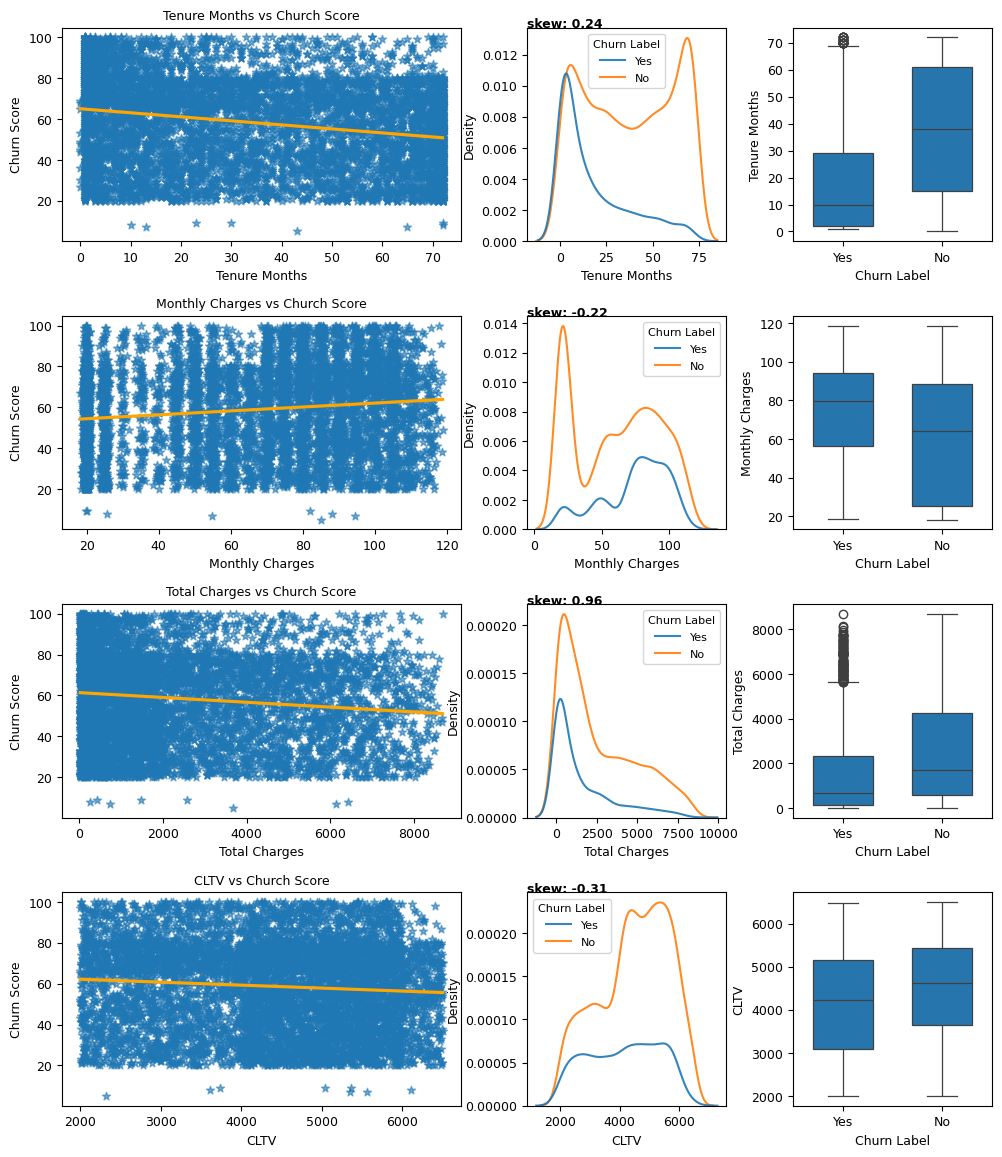

In [26]:
# Before applying log
number_columns = df_FE.select_dtypes('number').drop(
    columns="Latitude,Longitude,Churn Value,Churn Score".split(',')
)

skewness_before_log = df_FE[number_columns.columns].skew()
fig, axes = plt.subplots(
    nrows=4,
    ncols=3,
    figsize=(12,14),
    gridspec_kw={'hspace':0.35, 'wspace':0.25, 'width_ratios': [0.6,0.3,0.3]},
)

axes = axes.flatten()
i = 0

for column in number_columns.columns:
    ax = axes[i]
    sns.regplot(
        data=df_FE,
        x=column,
        y='Churn Score',
        ax=ax,
        scatter_kws={'alpha': 0.6},
        marker='*',
        line_kws={'color': 'orange'},
    )
    
    ax.set_title(f'{column} vs Church Score', size=9)
    ax = axes[i+1]
    sns.kdeplot(
        data=df_FE, x=column, hue='Churn Label', ax=ax, fill=False, alpha=0.9, legend=True
    )
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight='bold',
    )
    legend = ax.get_legend()
    plt.setp(legend.get_title(), fontsize=8)
    for text in legend.get_texts():
        text.set_fontsize(8)
    
    ax = axes[i+2]
    sns.boxplot(
        data=df_FE,
        x='Churn Label',
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    
    i+=3

From the boxplots, we can see that there are some outliers in the "Total Charges" and "Tenure Months" columns. Also, an acceptabel level of skewness is between -0.5 and +0.5, however, the histogram suggests that the "Total Charges" is highly skewed since it has a skewness of 0.96.

**Solution:**
We will simply apply log to the "Total Charges" column to mitigate the effect of both the outliers and the deviation from norma distribution. 

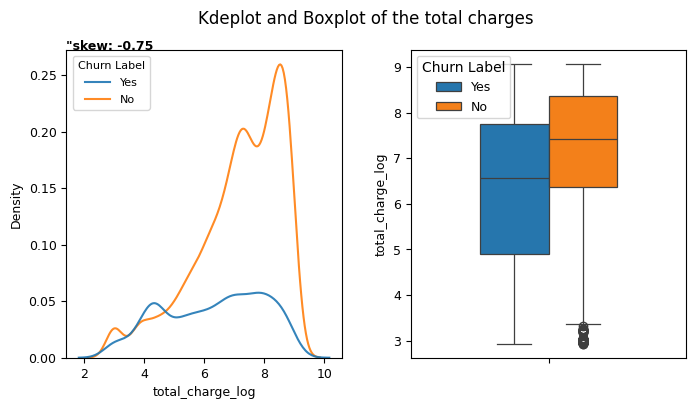

In [27]:
# After applying log
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8,4),
    gridspec_kw={"hspace":0.35, "wspace":0.25, "width_ratios": [0.3,0.3]}
)

axes = axes.flatten()

df_copy = df.copy()
df_copy['total_charge_log'] = df_copy['Total Charges'].apply(np.log)
skewness = df_copy['total_charge_log'].skew()

ax = axes[0]
sns.kdeplot(
    data=df_copy, x='total_charge_log', hue='Churn Label', ax=ax, fill=False, alpha=0.9
)
ax.text(
    ax.get_xlim()[0], ax.get_ylim()[-1], f'"skew: {skewness:.2f}', size=9, weight='bold'
)
legend = ax.get_legend()
plt.setp(legend.get_title(), fontsize=8)

for text in legend.get_texts():
    text.set_fontsize(8)
    
ax = axes[1]
sns.boxplot(
    data=df_copy,
    hue="Churn Label",
    y='total_charge_log',
    ax=ax,
    width=0.5,
    saturation=0.9,
    linewidth=0.9
)
plt.suptitle('Kdeplot and Boxplot of the total charges')
plt.show()

From plot above, the skewness of the "Total Charges" column has reduced to 0.76


**4. Encoding Categorical Columns**

In [28]:
# OneHotEncoding with pandas get dummies

df_copy = pd.get_dummies(df, columns=df.select_dtypes("O").columns)
print("Shape before encoding: ", df.shape)
print("Shape after encoding: ", df_copy.shape)

df_copy.head()

Shape before encoding:  (7043, 33)
Shape after encoding:  (7043, 9901)


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239,...,False,False,False,False,False,False,False,False,False,False
1,1,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701,...,False,False,False,True,False,False,False,False,False,False
2,1,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372,...,False,False,False,True,False,False,False,False,False,False
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,...,False,False,False,True,False,False,False,False,False,False
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,...,False,False,False,False,False,False,False,False,False,False


Applying one hot encoding has added 1175 columns leading to a high dimensionality in our data.

## Hypothesis Testing
---
**Hypothesis 1: Phone Service Impact Churn**
* Null Hypothesis (H0): There is no significant relationship between Phone Service and Churn.
* Alternative Hypothesis (H1): There is a significant relationship between Phone Service and Churn.

**Hypothesis 2: Contract Type Affects Churn**
* Null Hypothesis (H0): The type of contract does not affect the likelihood of churn.
* Alternative Hypothesis (H1): The type of contract significantly influences the likelihood of churn.

**Hypothesis 3: Seniority Affects Churn**
* Null Hypothesis (H0): The Senior Citizen does not affect the likelihood of churn.
* Alternative Hypothesis (H1): The Senior Citizen significantly influences the likelihood of churn.






Chi Square Test to to test if a categorical column has a relation with churn label

x^2 = ∑^n,_i=1  (O_i - E_i)^2 / E_i

In [29]:
def chi_square_test(dataframe: DataFrame):
    
    columns = ["Phone Service", "Contract", "Senior Citizen"]
    p_value = []
    dofs = []
    chi_square = []
    
    for column in columns:
        crosstab = pd.crosstab(
            index=dataframe[column], columns=dataframe['Churn Label']
        )
        chi_value, p, dof, ev = chi2_contingency(crosstab)
        chi_square.append(chi_value)
        dofs.append(dof)
        p_value.append(p)
        
    return pd.DataFrame(
        {
        "column": columns,
        "test_statistics": np.round(chi_square),
        "degree_of_freedom": dof,
        "p_value": np.round(p_value,2)
        }
    )
    

In [30]:
chi_table = chi_square_test(df)
chi_table['Decision'] = np.where(
    chi_table.p_value < 0.05, 'significant', 'not significant'
)
chi_table

,column,test_statistics,degree_of_freedom,p_value,Decision
0,Phone Service,1.0,1,0.34,not significant
1,Contract,1185.0,1,0.00,significant
2,Senior Citizen,159.0,1,0.00,significant


### Interpretation of hypothesis results
---
**Hypothesis 1 (Phone Service Impact Churn):**
* **Conclusion:**
    The p-value for the hypothesis testing related to "Phone Service" is 0.34, which is greater than the chosen significance level (alpha). Therefore, we fail to reject the null hypothesis (HO). This suggests that there is no significant evidence to support the idea that "Phone Service" has a significant impact on churn in this dataset.

**Hypothesis 2 (Contract Type Affects Churn):**
* **Conclusion:**
    The p-value for the hypothesis testing related to "Contract" is 0.00, which is less than the chosen significance level (alpha). Therefore, we reject the null hypothesis (HO). This indicates that there is significant evidence to support the idea that the "Type of Contract" significantly influences the liklehood of churn in this dataset.

**Hypothesis 3 (Seniority Affects Churn):**
* **Conclusion:**
    The p-value for the hypothesis testing related to "Senior Citizen" is 0.00, which is less than the chosen significance level (alpha). Therefore, we reject the null hypothesis (HO). This suggests that there is significant evidence to support the idea that being a Senior Citizen significantly influences the likelihood of churn in this dataset.

## Suggestions for the next steps in analyzing the data
---
* **Customer Segmentation:** 

    We can explore the customer segmentation to better understand different customer groups.
* **Principal Component Analysis:**

    We can apply PCA to reduce the dimensionality of the data and focus on more important features.

* **Machine Learning Modeling:**

    Applying machine learning techniques to build predictive models for customer churn. We can use classification algorithms like logistic regression, decision tress, or gradient boosting to predict which customers are likely to churn.

## Summary of quality of data
---
The quality of the provided data appears to be relatively high, with a comprehensive set of variables and attributes for analyzing customer churn. The dataset includes essential information, such as customer demographics, service details, billing information, and churn labels, making it suitable for various analytical tasks. However, a thorough data cleaning process, including handling missing values, outliers, and potential inconsistencies, may be necessary before advanced analytics and modeling. Additionally, the quality of analysis and decision-making based on this data will depend on the accuracy and representativeness of the information, as well as the relevance of the features chosen for specific analytical tasks.

## Customer Segmentation

**Customer Segmentation** is the process of dividing a company's customer base into distinct groups, or segments, based on shared characteristics. These segments are typically formed by analyzing data on customer demographics, behaviors, purchasing patterns, preferences, or other relevant attributes. The goal of customer segmentation is to identify and understand these distinct groups so that businesses can tailor their marketing strategies, product offerings, and services to meet the specific needs and preferences of each segment more effectively.


**Common Typs of Customer Segmentation**
1. **Demographic Segmentation:** Based on demographic factors like age, gender, income, education, occupation, etc.
2. **Geogprahic Segmentation:** Divides customers based on their geographic location, such as country, city, or climate.
3. **Psycographic Segmentation:** Considers psychological traits like lifestyle, personality, values, and interests.
4. **Behevioral Segmentation:** Focuses on customer behavior, including purchasing habits, product usage, brand loyalty, and decision-making patterns.
5. **Firmographic Segmentation:** For B2B companies, segments are based on company characteristics like industry, company size, and revenue.

**Benefits of Customer Segmentation**
* **Personalized Marketing:** Allows for targeted and relevant messaging, which can improve customer engagement and conversion rates.
* **Improved Customer Retention:** Helps in identifying the needs of different customer groups, enabling businesses to improve satisfaction and reduce churn.
* **Enhanced Product Development:** Provides insights into customer preferences, which can guide product design and feature prioritization.
* **Optimized Resource Allocation:** Enables businesses to focus marketing and sales efforts on the most profitable segments, maximizing ROI.

By using segmentation, businesses can better understand their customers and create more customized and effective marketing strategies.




### **Demographic Segmentation**

**K-Prototypes**

* An extension of K-Means clustering algorithm designed for mixed data types (both numerical and categorical). It combines the distance-based approach of K-Means with a similarity measure for categorical data.
* **Use Case:** Ideal for customer segmentation tasks where the dataset contains both numerical and categorical data.
* **How it Works:** Minimizes a cost function that includes both Euclidean distance for numerical data and dissimilarity for categorical data. Clusters are formed based on minimizing this combined measure.


1. Prepare the data

In [53]:
# Select demographic variables
demographic_df = df[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Monthly Charges', 'CLTV']]

# Encode categorical data as needed
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
for col in categorical_columns:
    demographic_df[col] = demographic_df[col].astype('category').cat.codes

# Scale numerical columns
scaler = StandardScaler()
numerical_columns = ['Tenure Months', 'Monthly Charges', 'CLTV']
demographic_df[numerical_columns] = scaler.fit_transform(demographic_df[numerical_columns])
demographic_df[numerical_columns]


,Tenure Months,Monthly Charges,CLTV
0,-1.236724,-0.362660,-0.981675
1,-1.236724,0.197365,-1.436462
2,-0.992402,1.159546,0.821409
3,-0.177995,1.330711,0.509483
4,0.677133,1.294151,0.794358
...,...,...,...
7038,1.613701,-1.449476,0.765617
7039,-0.340876,0.665992,-1.910691
7040,1.613701,1.277533,0.980330
7041,-0.870241,-1.168632,-1.358692


In [56]:
demographic_df[categorical_columns]

,Gender,Senior Citizen,Partner,Dependents
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,1
4,1,0,0,1
...,...,...,...,...
7038,0,0,0,0
7039,1,0,1,1
7040,0,0,1,1
7041,0,0,1,1


**2. Run K-prototypes Clustering**

With the data prepared, K-prototypes clustering can now be applied by specifying which columns are categorical in the clustering algorithm.

In [63]:
# Convert categorical column names to indices
categorical_indices = [demographic_df.columns.get_loc(col) for col in categorical_columns]
categorical_indices

[0, 1, 2, 3]

In [100]:
num_clusters = 4 # Adjust as 

# Initialize and fit the K-Prototypes model
kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(demographic_df, categorical=categorical_indices)

# Add the cluster labels to the original data for analysis
demographic_df['Cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3083, ncost: 11415.082832309468
Run: 1, iteration: 2/100, moves: 746, ncost: 11239.839177378035
Run: 1, iteration: 3/100, moves: 181, ncost: 11220.178570045086
Run: 1, iteration: 4/100, moves: 65, ncost: 11217.11814113608
Run: 1, iteration: 5/100, moves: 21, ncost: 11216.898828685074
Run: 1, iteration: 6/100, moves: 8, ncost: 11216.820998910978
Run: 1, iteration: 7/100, moves: 9, ncost: 11216.775434311512
Run: 1, iteration: 8/100, moves: 2, ncost: 11216.769121109613
Run: 1, iteration: 9/100, moves: 0, ncost: 11216.769121109613
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1465, ncost: 11826.076483653891
Run: 2, iteration: 2/100, moves: 732, ncost: 11562.213231370173
Run: 2, iteration: 3/100, moves: 315, ncost: 11474.06608093779
Run: 2

**4. Analyze the Results**

Analyze the demographic segments by examining the clusters

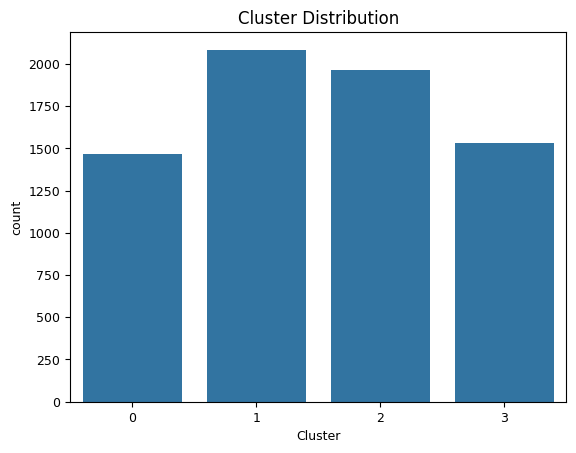

In [101]:
# Display cluster centroids
kproto.cluster_centroids_

# Analyze the composition of each cluster
demographic_df.groupby('Cluster').mean()

# Visualize the clusters
sns.countplot(data=demographic_df, x='Cluster')
plt.title('Cluster Distribution')
plt.show()

In [110]:
demographic_df[demographic_df['Cluster'] == 0].head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,CLTV,Cluster
7,1,0,0,0,-1.277445,-1.482712,0.364932,0
39,1,1,1,0,1.043616,-0.646828,0.882272,0
44,0,0,0,0,-1.277445,-1.156999,0.113024,0
47,0,0,1,0,-1.277445,-1.328164,0.380993,0
65,1,0,0,0,1.084337,-1.509300,0.577954,0
67,1,0,0,0,-1.277445,-1.328164,0.580490,0
91,0,1,0,0,-0.463037,-0.759830,0.319284,0
99,1,1,1,0,-0.870241,-1.489359,1.257598,0
108,0,0,1,0,1.165777,-1.507638,-0.151564,0
121,0,0,1,0,0.636413,-0.646828,0.444392,0


In [111]:
demographic_df[demographic_df['Cluster'] == 1].head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,CLTV,Cluster
0,1,0,0,0,-1.236724,-0.362660,-0.981675,1
1,0,0,0,1,-1.236724,0.197365,-1.436462,1
9,1,0,1,0,-1.277445,-1.148690,-1.255562,1
10,0,0,0,0,-0.625919,-0.002050,-1.165112,1
11,1,0,0,1,-1.114563,0.164129,-1.645258,1
12,1,0,0,1,0.066327,1.382226,-1.233583,1
15,0,0,0,1,-0.707359,1.141266,-1.212450,1
17,1,1,0,1,-0.585198,1.019955,-1.032395,1
19,0,0,0,1,-1.277445,0.484856,-1.620743,1
20,0,0,1,1,-1.033122,0.345265,-0.797394,1


In [112]:
demographic_df[demographic_df['Cluster'] == 2].head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,CLTV,Cluster
3,0,0,1,1,-0.177995,1.330711,0.509483,2
4,1,0,0,1,0.677133,1.294151,0.794358,2
8,1,0,1,1,0.595692,1.149575,1.173910,2
24,1,0,1,0,1.450820,1.503538,0.535688,2
25,1,0,1,1,0.921455,1.063161,0.637127,2
41,0,0,1,0,0.840014,1.000013,-0.061114,2
70,0,0,1,0,0.799294,1.339020,0.370849,2
82,0,1,0,0,0.880735,0.587888,-0.212427,2
86,1,0,1,0,1.450820,0.366869,0.424950,2
87,0,0,0,0,0.432811,1.324064,0.718279,2


In [113]:
demographic_df[demographic_df['Cluster'] == 3].head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,CLTV,Cluster
2,0,0,0,1,-0.992402,1.159546,0.821409,3
5,0,0,1,0,-0.910961,-0.317792,1.288875,3
6,1,1,0,0,-1.277445,-0.834611,0.872974,3
13,0,0,0,1,-0.870241,1.099721,1.076698,3
14,0,0,0,1,-1.236724,0.528063,1.002309,3
16,0,1,1,1,-0.992402,0.528063,0.762236,3
18,0,0,0,1,-0.951682,0.985057,0.989629,3
21,0,0,0,1,-0.829521,0.471562,1.188281,3
23,0,1,1,1,-0.300156,1.121324,0.791822,3
27,0,0,1,1,-0.910961,1.179487,1.350584,3


**Interpretaion of K-Prototypes**
---

It appears the K-Prototypes has clustered the data distinctly by the Customer Lifetime Value(CLTV).
* Cluster 0: Has some negative

2. **Hierarchical Clustering**

* A method that builds nested clusters in a tree-like structure called a dendrogram. It can bee either agglomerative (bottom-up) or divisive (top_down)
* **Use Case:** Useful for situations where you want to understand the hierchical relationships between clusters or need a flexible number of clusters.
* **How it Works:** The agglomerative approach starts with each data point as a seperate cluster and then merges the closest pairs of clusters step-by-step. Divisive clustering, conversely, starts with all data points in one cluster and splits them iteratively. 

In [68]:
# Hierarchical clustering

### Geographic Segmentation

**K-Means Clustering**

* K-Means is a popular clustering algorithm that partitions data into k clusters based on the similarity of data points. It uses the mean of each cluster (centroid) to measure similarity.
* **Use Case:** Suitable for segmenting numerical data and is commonly used in customer segmentation, market research, and image compression.
* **How it Works:** Starts by initializing k centroids and assigns data points to the nearest centroid. It then updates the centroids based on the assigned points, repeating this process until convergence (when assignments no longer change).

In [66]:
# K-Means Clustering

**Latent Class Analysis (LCA)**
* LCA is a statistical method used to identify subgroups (latent classe) within categorical data. It is especially useful for discovering underlying categorical structures that are not directly observed.
* **Use Case:** Often used in psychology, social sciences, and marketing to group individuals bsed on categorical responses, such as survey data.
* **How it Works:** LCA estimates the probability of each data point belonging to latent classes, using maximum likelihood estimation. It outputs class membership probabilities, which indicate how likely each observation is to belong to each class.

In [67]:
# LCA

### Behavioral Segmentation

**K-Means**

In [ ]:
# K-Means Clustering

**LCA**

In [72]:
# LCA

**Decsion Tree**

In [70]:
# Decision Tree

**Random Forest**

In [71]:
# Random Forest